In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Hello
1,0.756979,0.426630,4.173376e-07,0.712905,0.469488,0.002864,0.666149,0.456551,0.001707,0.638854,...,0.559217,0.306323,-0.039063,0.518564,0.289496,-0.040459,0.485345,0.271896,-0.041195,Hello
2,0.772947,0.470606,3.115210e-07,0.720713,0.499343,0.000635,0.662571,0.472678,-0.000213,0.628255,...,0.579459,0.310804,-0.053263,0.539262,0.291879,-0.057419,0.504405,0.275511,-0.060245,Hello
3,0.748578,0.434088,3.783607e-07,0.707641,0.471160,-0.006553,0.661229,0.455750,-0.011822,0.631473,...,0.560503,0.311557,-0.041094,0.520028,0.296855,-0.043235,0.486686,0.282122,-0.044049,Hello
4,0.860187,0.612702,3.699255e-07,0.808490,0.629204,-0.009659,0.758390,0.595418,-0.017539,0.727112,...,0.707178,0.457884,-0.062802,0.670981,0.436762,-0.069497,0.640756,0.417613,-0.073436,Hello
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1814,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,B
1815,0.662151,0.436314,1.573471e-07,0.620020,0.401227,-0.007026,0.593700,0.336312,-0.017288,0.562349,...,0.703391,0.197960,-0.058770,0.705483,0.147972,-0.056956,0.704051,0.107813,-0.055879,B
1816,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,B
1817,0.241119,0.750756,-3.124345e-07,0.394886,0.657832,0.026024,0.455503,0.553107,0.011475,0.492403,...,0.377379,0.305642,-0.156290,0.454841,0.344127,-0.141449,0.477489,0.412570,-0.125174,B


In [3]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Hello
1,0.756979,0.426630,4.173376e-07,0.712905,0.469488,0.002864,0.666149,0.456551,0.001707,0.638854,...,0.559217,0.306323,-0.039063,0.518564,0.289496,-0.040459,0.485345,0.271896,-0.041195,Hello
2,0.772947,0.470606,3.115210e-07,0.720713,0.499343,0.000635,0.662571,0.472678,-0.000213,0.628255,...,0.579459,0.310804,-0.053263,0.539262,0.291879,-0.057419,0.504405,0.275511,-0.060245,Hello
3,0.748578,0.434088,3.783607e-07,0.707641,0.471160,-0.006553,0.661229,0.455750,-0.011822,0.631473,...,0.560503,0.311557,-0.041094,0.520028,0.296855,-0.043235,0.486686,0.282122,-0.044049,Hello
4,0.860187,0.612702,3.699255e-07,0.808490,0.629204,-0.009659,0.758390,0.595418,-0.017539,0.727112,...,0.707178,0.457884,-0.062802,0.670981,0.436762,-0.069497,0.640756,0.417613,-0.073436,Hello
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1814,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,B
1815,0.662151,0.436314,1.573471e-07,0.620020,0.401227,-0.007026,0.593700,0.336312,-0.017288,0.562349,...,0.703391,0.197960,-0.058770,0.705483,0.147972,-0.056956,0.704051,0.107813,-0.055879,B
1816,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,B
1817,0.241119,0.750756,-3.124345e-07,0.394886,0.657832,0.026024,0.455503,0.553107,0.011475,0.492403,...,0.377379,0.305642,-0.156290,0.454841,0.344127,-0.141449,0.477489,0.412570,-0.125174,B


In [4]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (1819, 63)
Labels shape = (1819,)


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [6]:
y_pred = svm.predict(x_test)
y_pred

array(['Washroom', 'I Love You', '2', 'Hello', 'I', 'Great', 'Please',
       'Great', 'Yes', '2', 'Great', '2', '2', 'Hello', '0', 'Great', 'K',
       '1', '2', 'No', 'G', 'I', '5', '9', 'No', 'R', '8', 'R', '2', '9',
       'I Love You', '2', 'Please', '2', '1', 'Great', '4', '6', '2',
       'Great', 'Yes', 'O', 'T', 'Hello', 'Great', 'R', '2', '4', 'P',
       'K', 'No', 'Great', '2', '5', '2', '2', '2', '5', 'L', 'Peace',
       'D', 'Please', '2', 'Food', '6', 'K', '2', 'No', '2', 'K', '5',
       'Washroom', 'K', 'Great', 'D', '2', '7', '8', '2', 'D', 'Yes', 'T',
       'D', '2', '2', '7', 'O', 'O', 'W', '9', '2', '0', 'No', 'D',
       'Great', 'Food', '7', '1', 'Hello', 'C', '1', 'Water', 'Washroom',
       'Washroom', 'R', '2', '5', '5', 'S', '2', '6', '2', 'O', 'Great',
       'Hello', 'R', '2', '8', 'Hello', '6', 'T', 'O', '2', 'O', 'R', '2',
       '7', 'Hello', '4', 'Peace', '2', 'Great', '1', 'W', '4',
       'Goodbye !!', 'K', 'Please', 'Yes', '2', 'Washroom', 'Sick', 

In [7]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.6318681318681318, 0.6318681318681318, 0.6318681318681318)

<Axes: title={'center': 'Confusion Matrix - American Sign Language'}>

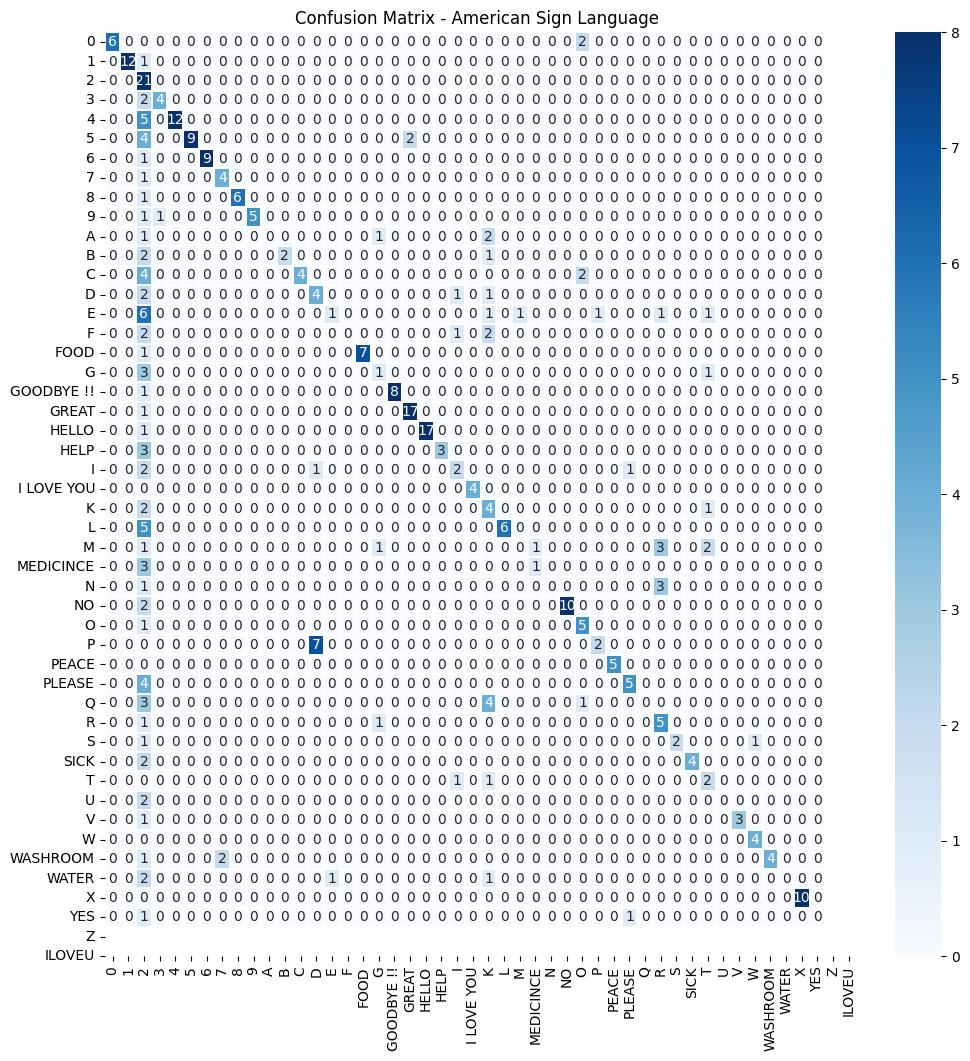

In [8]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [9]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)